<center><img src="https://datasciencedojo.com/wp-content/uploads/data-science-dojo-logo-1.png" width="700"/><center>

## How to Install Sns Scraper Library

### Paste the following command in cmd, make sure you have git installed on your system
pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

In [1]:
import pandas as pd
import numpy as np
import snscrape.modules.twitter as sntwitter
import datetime
from tqdm.notebook import tqdm_notebook
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Taking user input
<img src="https://i.pinimg.com/originals/2e/82/ed/2e82eda13b1ad2f508a6651858124034.png" width="250" height="250" />

In [2]:
text = input('Enter query text to be matched (or leave it blank by pressing enter)')
username = input('Enter specific username(s) from a twitter account without @ (or leave it blank by pressing enter): ')
since = input('Enter startdate in this format yyyy-mm-dd (or leave it blank by pressing enter): ')
until = input('Enter enddate in this format yyyy-mm-dd (or leave it blank by pressing enter): ')
count = int(input('Enter max number of tweets or enter -1 to retrieve all possible tweets: '))
retweet = input('Exclude Retweets? (y/n): ')
replies = input('Exclude Replies? (y/n): ')

Enter query text to be matched (or leave it blank by pressing enter)
Enter specific username(s) from a twitter account without @ (or leave it blank by pressing enter): DataScienceDojo
Enter startdate in this format yyyy-mm-dd (or leave it blank by pressing enter): 2018-01-01
Enter enddate in this format yyyy-mm-dd (or leave it blank by pressing enter): 
Enter max number of tweets or enter -1 to retrieve all possible tweets: 10000
Exclude Retweets? (y/n): y
Exclude Replies? (y/n): y


# List of Fields which we can Scrape using this Library

- url: str
- date: datetime.datetime
- rawContent: str
- renderedContent: str
- id: int
- user: 'User'
- replyCount: int
- retweetCount: int
- likeCount: int
- quoteCount: int
- conversationId: int
- lang: str
- source: str
- sourceUrl: typing.Optional[str] = None
- sourceLabel: typing.Optional[str] = None
- links: typing.Optional[typing.List['TextLink']] = None
- media: typing.Optional[typing.List['Medium']] = None
- retweetedTweet: typing.Optional['Tweet'] = None
- quotedTweet: typing.Optional['Tweet'] = None
- inReplyToTweetId: typing.Optional[int] = None
- inReplyToUser: typing.Optional['User'] = None
- mentionedUsers: typing.Optional[typing.List['User']] = None
- coordinates: typing.Optional['Coordinates'] = None
- place: typing.Optional['Place'] = None
- hashtags: typing.Optional[typing.List[str]] = None
- cashtags: typing.Optional[typing.List[str]] = None
- card: typing.Optional['Card'] = None

<img src="https://thumbs.dreamstime.com/b/emoticon-face-surprised-cute-enraptured-emotions-emoji-excited-admiring-look-googly-eyes-saying-wow-emotion-raises-his-117237570.jpg" width="250" height="250" />

In [ ]:
def search(text,username,since,until,retweet,replies):
    global filename
    q = text
    if username!='':
        q += f" from:{username}"    
    if until=='':
        until = datetime.datetime.strftime(datetime.date.today(), '%Y-%m-%d')
    q += f" until:{until}"
    if since=='':
        since = datetime.datetime.strftime(datetime.datetime.strptime(until, '%Y-%m-%d') - 
                                           datetime.timedelta(days=7), '%Y-%m-%d')
    q += f" since:{since}"
    if retweet == 'y':
        q += f" exclude:retweets"
    if replies == 'y':
        q += f" exclude:replies"
    if username!='' and text!='':
        filename = f"{since}_{until}_{username}_{text}.csv"
    elif username!="":
        filename = f"{since}_{until}_{username}.csv"
    else:
        filename = f"{since}_{until}_{text}.csv"
    print(filename)
    return q

In [3]:
q = search(text,username,since,until,retweet,replies)
# Creating list to append tweet data 
tweets_list1 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
if count == -1:
    for i,tweet in enumerate(tqdm_notebook(sntwitter.TwitterSearchScraper(q).get_items())):
        tweets_list1.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username,tweet.lang,
        tweet.hashtags,tweet.replyCount,tweet.retweetCount,tweet.likeCount,tweet.quoteCount,tweet.media])
else:
    with tqdm_notebook(total=count) as pbar:
        for i,tweet in enumerate(sntwitter.TwitterSearchScraper(q).get_items()): #declare a username 
            if i>=count: #number of tweets you want to scrape
                break
            tweets_list1.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username,tweet.lang,
        tweet.hashtags,tweet.replyCount,tweet.retweetCount,tweet.likeCount,tweet.quoteCount,tweet.media])
            pbar.update(1)
# Creating a dataframe from the tweets list above 
tweets_df1 = pd.DataFrame(tweets_list1, columns=['DateTime', 'TweetId', 'Text', 'Username','Language',
                                'Hashtags','ReplyCount','RetweetCount','LikeCount','QuoteCount','Media'])

2018-01-01_2022-09-27_DataScienceDojo.csv


  0%|          | 0/10000 [00:00<?, ?it/s]

<img src="https://t3.ftcdn.net/jpg/04/43/96/78/240_F_443967845_joaRzzgkU09Tyd62Is1h7JKmnIO7DdX0.jpg" width="250" height="250"/>

In [4]:
tweets_df1.sort_values(by='DateTime',ascending=False)

,DateTime,TweetId,Text,Username,Language,Hashtags,ReplyCount,RetweetCount,LikeCount,QuoteCount,Media
0,2022-09-26 23:08:01+00:00,1574536295694614528,💥 Python cheat sheet for interview questions!\...,DataScienceDojo,en,"[Python, Interview, CheatSheet]",9,312,1512,2,[Photo(previewUrl='https://pbs.twimg.com/media...
1,2022-09-26 21:59:59+00:00,1574519176760287233,How #5G Will Unleash #AI. Go to: https://t.co/...,DataScienceDojo,en,"[5G, AI]",0,3,4,0,None
2,2022-09-26 20:59:59+00:00,1574504076594798628,#MachineLearning Enabled Predictions With Couc...,DataScienceDojo,en,[MachineLearning],0,1,3,0,None
3,2022-09-26 20:08:00+00:00,1574490993235312651,"💡 Differences between data science, machine le...",DataScienceDojo,en,"[DataScience, ML, AI]",1,40,191,1,[Photo(previewUrl='https://pbs.twimg.com/media...
4,2022-09-26 18:59:59+00:00,1574473877773860870,The Pulse of #Fintech Report: https://t.co/jNS...,DataScienceDojo,en,[Fintech],0,1,2,0,None
...,...,...,...,...,...,...,...,...,...,...,...
9995,2018-07-06 09:32:00+00:00,1015166463886454784,#datascienceandcrime\nhttps://t.co/NjLkB9L6ed,DataScienceDojo,qme,[datascienceandcrime],0,0,0,0,None
9996,2018-07-05 22:10:01+00:00,1014994836150210560,"""The first question that may come to our minds...",DataScienceDojo,en,None,0,0,0,0,None
9997,2018-07-05 09:40:00+00:00,1014806088238227456,"""Conversational AI is not limited to one indus...",DataScienceDojo,en,None,0,0,0,0,None
9998,2018-07-05 00:08:00+00:00,1014662140718919680,"""One thing is clear that traditional methods o...",DataScienceDojo,en,None,0,0,0,0,None


# Data Preprocessing
<img src="https://media.istockphoto.com/vectors/print-vector-id647149610?k=20&m=647149610&s=612x612&w=0&h=Bwvogu-TPxrLiM47UC09_vNvA1by1lewi73PQEK2xxo=" width="300" height="300" />

In [5]:
tweets_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   DateTime      10000 non-null  datetime64[ns, UTC]
 1   TweetId       10000 non-null  int64              
 2   Text          10000 non-null  object             
 3   Username      10000 non-null  object             
 4   Language      10000 non-null  object             
 5   Hashtags      7786 non-null   object             
 6   ReplyCount    10000 non-null  int64              
 7   RetweetCount  10000 non-null  int64              
 8   LikeCount     10000 non-null  int64              
 9   QuoteCount    10000 non-null  int64              
 10  Media         4782 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 859.5+ KB


<img src="https://pbs.twimg.com/tweet_video_thumb/FA3vZ6DVQAQwDri.jpg" width="250" height="250" />

# Adding more columns for time-series analysis

In [6]:
tweets_df1['Hour'] = tweets_df1['DateTime'].dt.hour
tweets_df1['Year'] = tweets_df1['DateTime'].dt.year  
tweets_df1['Month'] = tweets_df1['DateTime'].dt.month
tweets_df1['MonthName'] = tweets_df1['DateTime'].dt.month_name()
tweets_df1['MonthDay'] = tweets_df1['DateTime'].dt.day
tweets_df1['DayName'] = tweets_df1['DateTime'].dt.day_name()
tweets_df1['Week'] = tweets_df1['DateTime'].dt.isocalendar().week

# Splitting timestamp column into separate date and time columns 

In [8]:
tweets_df1['Date'] = [d.date() for d in tweets_df1['DateTime']]
tweets_df1['Time'] = [d.time() for d in tweets_df1['DateTime']]

# Dropping DateTime Column

In [10]:
tweets_df1.drop('DateTime',axis=1,inplace=True)
tweets_df1

# Saving as CSV file

In [11]:
tweets_df1.to_csv(f"{filename}",index=False)

# Loading Saved CSV file

In [13]:
#tweets = pd.read_csv(f'{filename}')
tweets = pd.read_csv("2018-01-01_2022-09-27_DataScienceDojo.csv")
tweets

,TweetId,Text,Username,Language,Hashtags,ReplyCount,RetweetCount,LikeCount,QuoteCount,Media,Hour,Year,Month,MonthName,MonthDay,DayName,Week,Date,Time
0,1574536295694614528,💥 Python cheat sheet for interview questions!\...,DataScienceDojo,en,"['Python', 'Interview', 'CheatSheet']",9,312,1512,2,[Photo(previewUrl='https://pbs.twimg.com/media...,23,2022,9,September,26,Monday,39,2022-09-26,23:08:01
1,1574519176760287233,How #5G Will Unleash #AI. Go to: https://t.co/...,DataScienceDojo,en,"['5G', 'AI']",0,3,4,0,NaN,21,2022,9,September,26,Monday,39,2022-09-26,21:59:59
2,1574504076594798628,#MachineLearning Enabled Predictions With Couc...,DataScienceDojo,en,['MachineLearning'],0,1,3,0,NaN,20,2022,9,September,26,Monday,39,2022-09-26,20:59:59
3,1574490993235312651,"💡 Differences between data science, machine le...",DataScienceDojo,en,"['DataScience', 'ML', 'AI']",1,40,191,1,[Photo(previewUrl='https://pbs.twimg.com/media...,20,2022,9,September,26,Monday,39,2022-09-26,20:08:00
4,1574473877773860870,The Pulse of #Fintech Report: https://t.co/jNS...,DataScienceDojo,en,['Fintech'],0,1,2,0,NaN,18,2022,9,September,26,Monday,39,2022-09-26,18:59:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1015166463886454784,#datascienceandcrime\nhttps://t.co/NjLkB9L6ed,DataScienceDojo,qme,['datascienceandcrime'],0,0,0,0,NaN,9,2018,7,July,6,Friday,27,2018-07-06,09:32:00
9996,1014994836150210560,"""The first question that may come to our minds...",DataScienceDojo,en,NaN,0,0,0,0,NaN,22,2018,7,July,5,Thursday,27,2018-07-05,22:10:01
9997,1014806088238227456,"""Conversational AI is not limited to one indus...",DataScienceDojo,en,NaN,0,0,0,0,NaN,9,2018,7,July,5,Thursday,27,2018-07-05,09:40:00
9998,1014662140718919680,"""One thing is clear that traditional methods o...",DataScienceDojo,en,NaN,0,0,0,0,NaN,0,2018,7,July,5,Thursday,27,2018-07-05,00:08:00


<img src="https://i.pinimg.com/236x/44/5c/24/445c24e40800c945aeee9e5684ce3861--emoticon.jpg" width="250" height="250" />

# Visualizing Count By Year

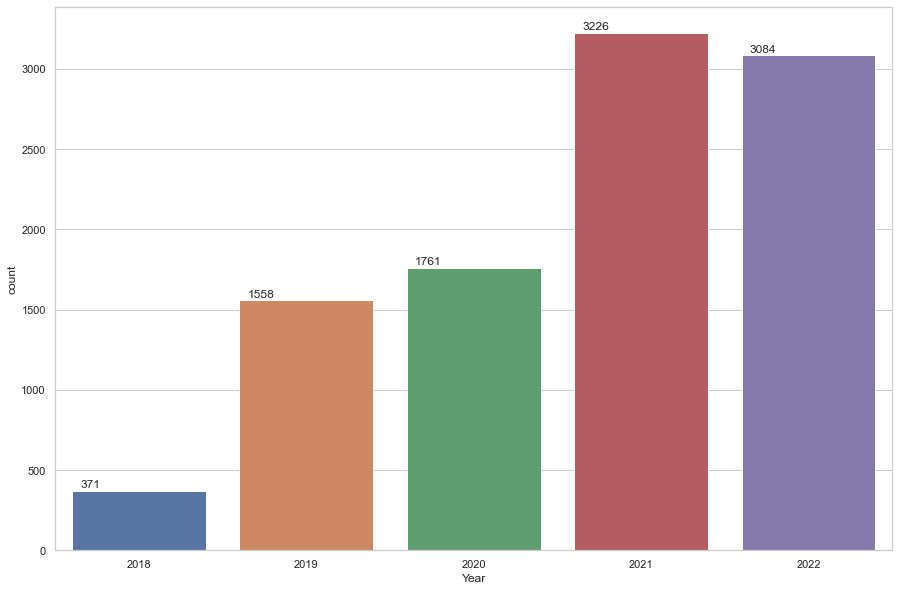

In [24]:
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x= tweets['Year'])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.05, p.get_height()+20), fontsize = 12)

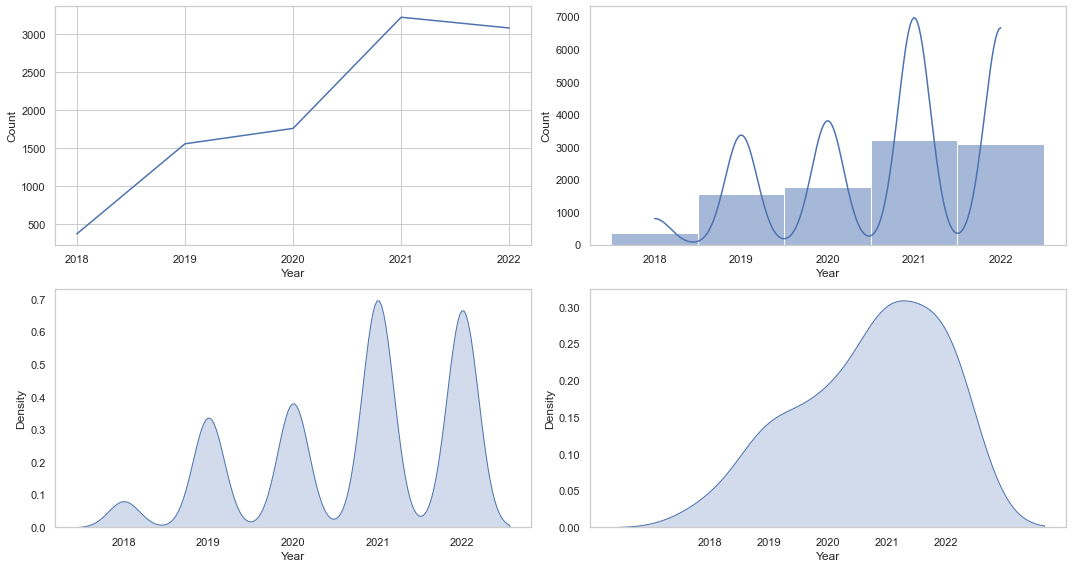

In [36]:
plt.figure(figsize=(15, 8))

ax=plt.subplot(221)
sns.lineplot(tweets.Year.value_counts())
ax.set_xlabel("Year")
ax.set_ylabel('Count')
plt.xticks(np.arange(2018,2023,1))

plt.subplot(222)
sns.histplot(x=tweets.Year,stat='count',binwidth=1,kde='true',discrete=True)
plt.xticks(np.arange(2018,2023,1))
plt.grid()

plt.subplot(223)
sns.kdeplot(x=tweets.Year,fill=True)
plt.xticks(np.arange(2018,2023,1))
plt.grid()

plt.subplot(224)
sns.kdeplot(x=tweets.Year,fill=True,bw_adjust=3)
plt.xticks(np.arange(2018,2023,1))
plt.grid()

plt.tight_layout()
plt.show()

<img src="https://t3.ftcdn.net/jpg/00/32/41/12/240_F_32411290_bkfuPtZK8VHpB7IawKpTj4vBQO0aPDQq.jpg" width="250" height="250" />

# Visualizing Count By Month

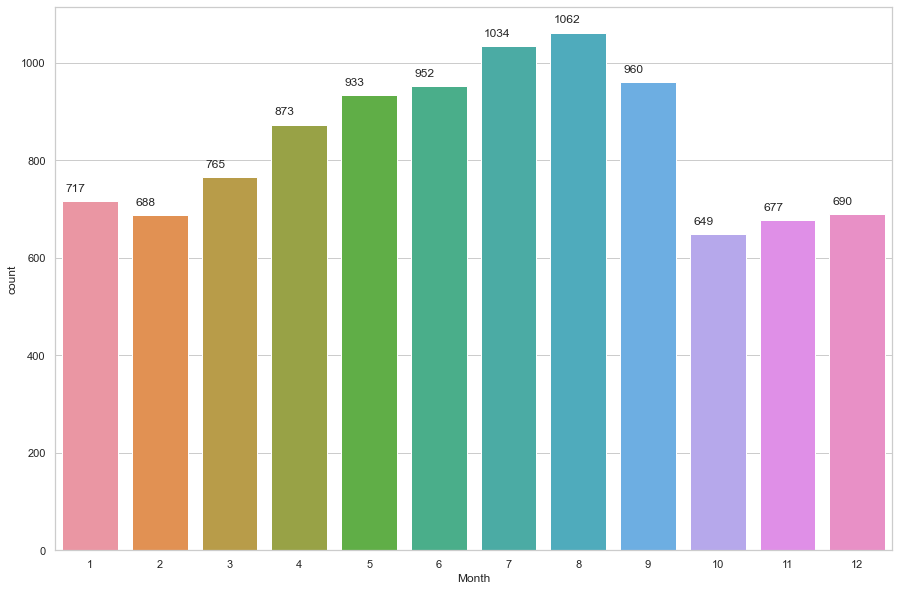

In [40]:
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x= tweets['Month'])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.05, p.get_height()+20), fontsize = 12)

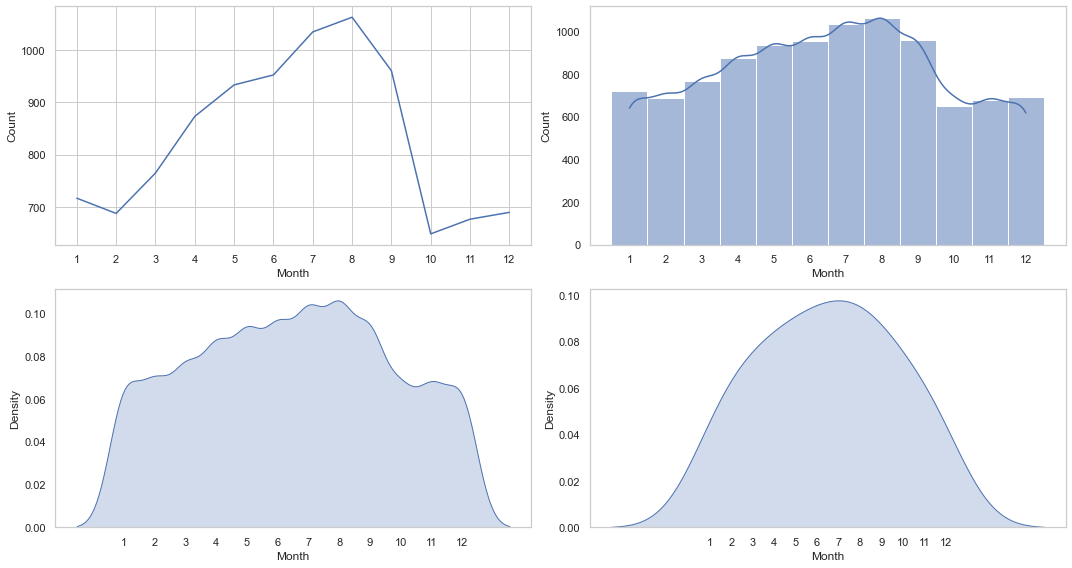

In [42]:
plt.figure(figsize=(15, 8))

ax=plt.subplot(221)
sns.lineplot(tweets.Month.value_counts())
ax.set_xlabel("Month")
ax.set_ylabel('Count')
plt.xticks(np.arange(1,13,1))

plt.subplot(222)
sns.histplot(x=tweets.Month,stat='count',binwidth=1,kde='true',discrete=True)
plt.xticks(np.arange(1,13,1))
plt.grid()

plt.subplot(223)
sns.kdeplot(x=tweets.Month,fill=True)
plt.xticks(np.arange(1,13,1))
plt.grid()

plt.subplot(224)
sns.kdeplot(x=tweets.Month,fill=True,bw_adjust=3)
plt.xticks(np.arange(1,13,1))
plt.grid()

plt.tight_layout()
plt.show()

# Visualizing Count By Week

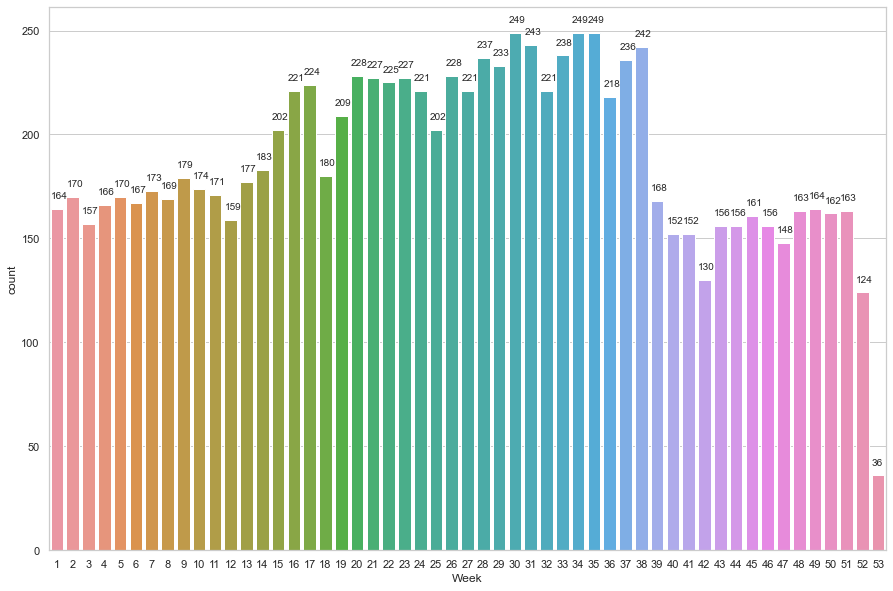

In [46]:
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x= tweets['Week'])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.005, p.get_height()+5), fontsize = 10)

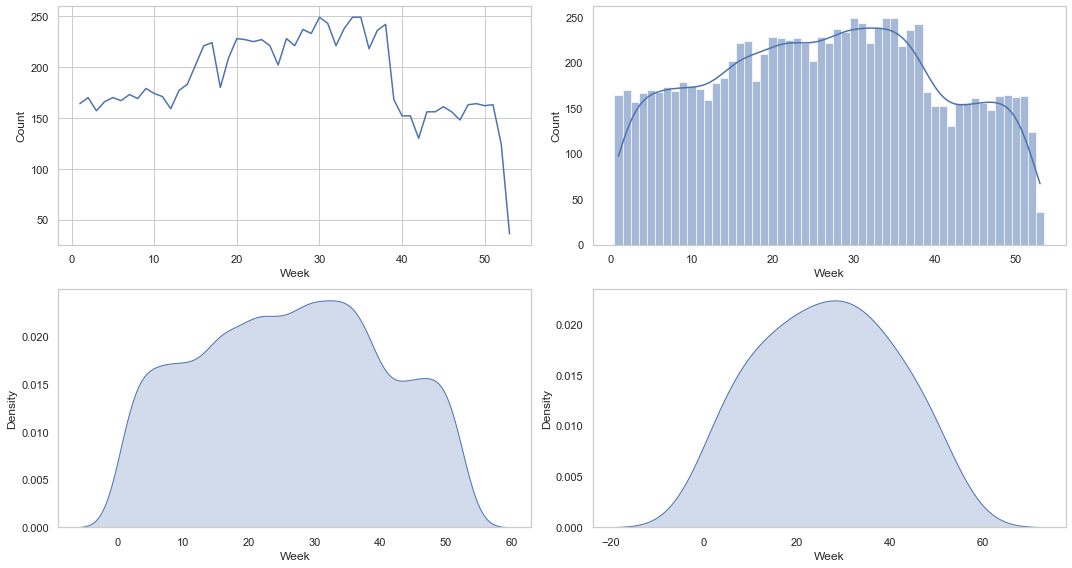

In [49]:
plt.figure(figsize=(15, 8))

ax=plt.subplot(221)
sns.lineplot(tweets.Week.value_counts())
ax.set_xlabel("Week")
ax.set_ylabel('Count')

plt.subplot(222)
sns.histplot(x=tweets.Week,stat='count',binwidth=1,kde='true',discrete=True)
plt.grid()

plt.subplot(223)
sns.kdeplot(x=tweets.Week,fill=True)
plt.grid()

plt.subplot(224)
sns.kdeplot(x=tweets.Week,fill=True,bw_adjust=3)
plt.grid()

plt.tight_layout()
plt.show()

# Visualizing Count By MonthDay

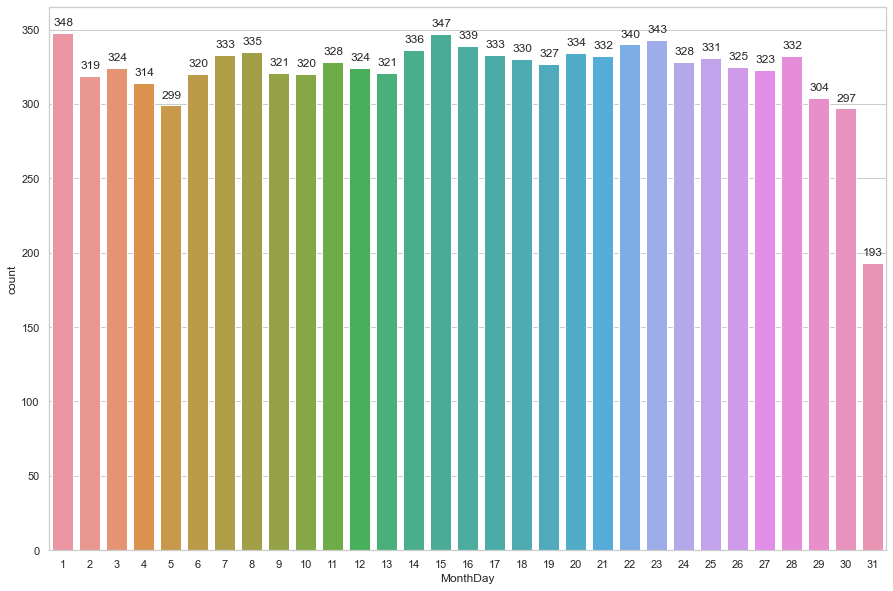

In [53]:
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x= tweets['MonthDay'])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.05, p.get_height()+5), fontsize = 12)

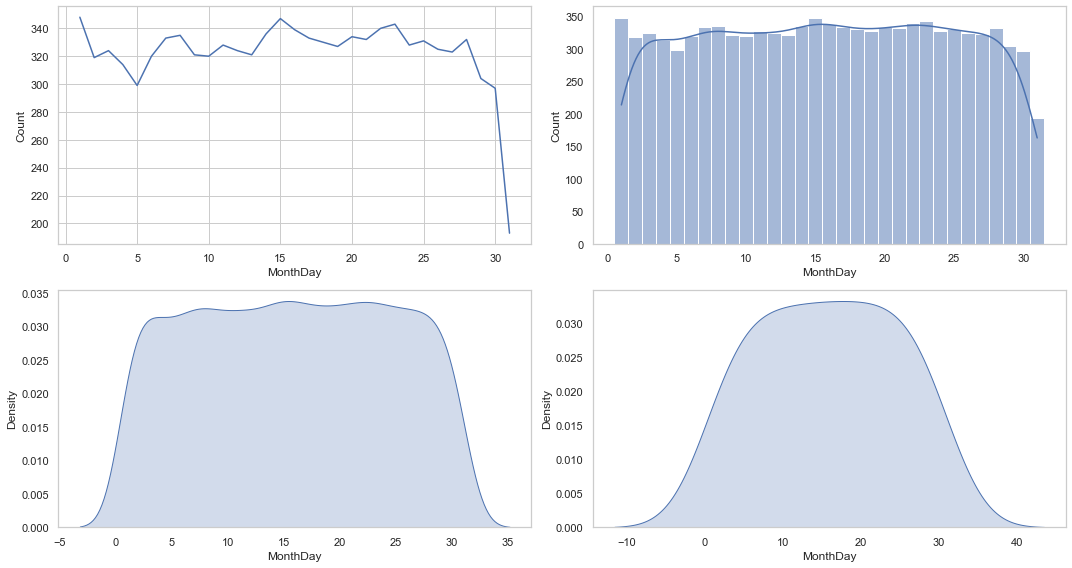

In [54]:
plt.figure(figsize=(15, 8))

ax=plt.subplot(221)
sns.lineplot(tweets.MonthDay.value_counts())
ax.set_xlabel("MonthDay")
ax.set_ylabel('Count')

plt.subplot(222)
sns.histplot(x=tweets.MonthDay,stat='count',binwidth=1,kde='true',discrete=True)
plt.grid()

plt.subplot(223)
sns.kdeplot(x=tweets.MonthDay,fill=True)
plt.grid()

plt.subplot(224)
sns.kdeplot(x=tweets.MonthDay,fill=True,bw_adjust=3)
plt.grid()

plt.tight_layout()
plt.show()

# Visualizing Count By Hour

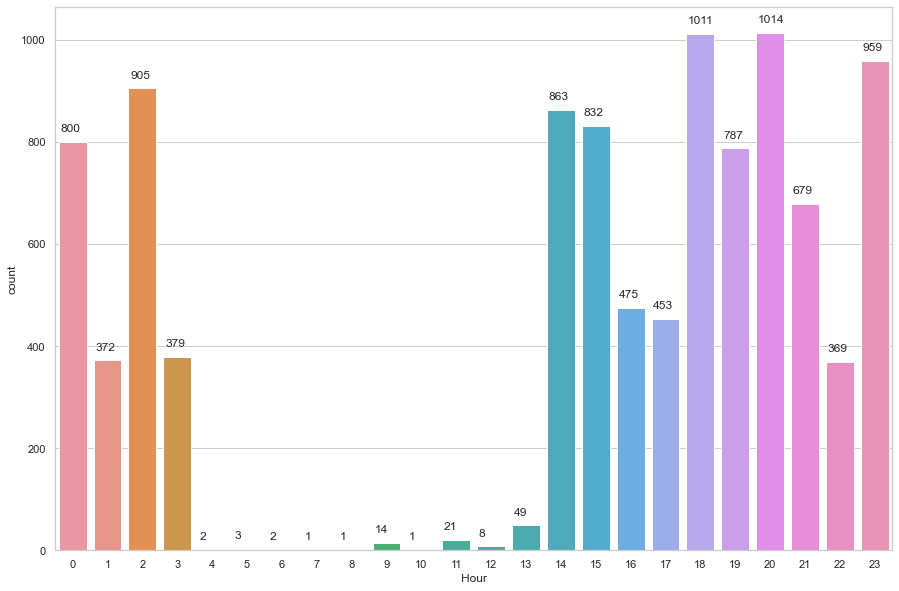

In [55]:
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x= tweets['Hour'])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.05, p.get_height()+20), fontsize = 12)

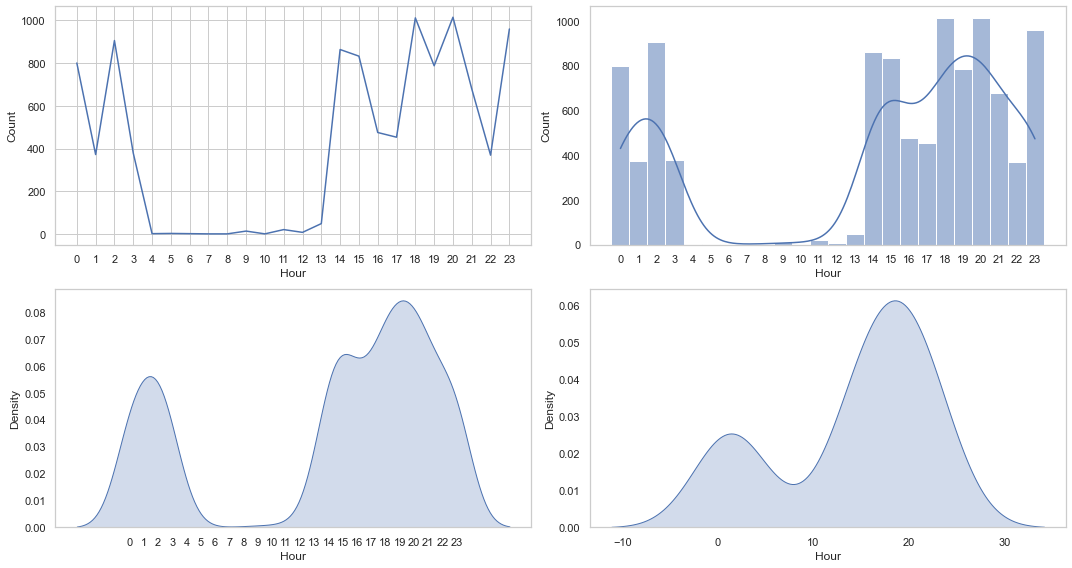

In [57]:
plt.figure(figsize=(15, 8))

ax=plt.subplot(221)
sns.lineplot(tweets.Hour.value_counts())
ax.set_xlabel("Hour")
ax.set_ylabel('Count')
plt.xticks(np.arange(0,24,1))

plt.subplot(222)
sns.histplot(x=tweets.Hour,stat='count',binwidth=1,kde='true',discrete=True)
plt.xticks(np.arange(0,24,1))
plt.grid()

plt.subplot(223)
sns.kdeplot(x=tweets.Hour,fill=True)
plt.xticks(np.arange(0,24,1))
plt.grid()

plt.subplot(224)
sns.kdeplot(x=tweets.Hour,fill=True,bw_adjust=3)
#plt.xticks(np.arange(0,24,1))
plt.grid()

plt.tight_layout()
plt.show()

<img src="https://i.ytimg.com/vi/AYZz_qYw_j4/maxresdefault.jpg" width="450" height="450" />